In [1]:
# The script MUST contain a function named azureml_main
# which is the entry point for this module.
#dataframe1 <- maml.mapInputPort(1) # class: data.frame
# imports up here can be used 

import pandas as pd
import stringdist as dist
from operator import itemgetter

# The entry point function can contain up to two input arguments:
#   Param<dataframe1>: a pandas.DataFrame
#   Param<dataframe2>: a pandas.DataFrame

def recommend_matter(matter,mattersList):
    # This function takes in a string and the list of real clients names and returns the 'closest' with respect to the
    # normalized levenshtein distance. All strings are converted to lower case before analyzing. For now it only returns
    # the best scored result. We could make it return a number of recommendations or call it multiple times to get suggestions
    # for more than one input. Note that this function NEEDS a data frame variable containing the list of real clients.
    print('parametros')
    print(matter)
    recommendations = []
    mattersList['lowCaseNames'] = mattersList['Name'].str.lower()
    matterLowerName = matter.lower()
    
    for i in range(len(mattersList.Name)):
        distance = dist.levenshtein_norm(matterLowerName, mattersList.lowCaseNames[i])
        recommendations.append((mattersList.Name[i], distance))
    recommendations.sort(key=itemgetter(1), reverse=False)
    return recommendations[0][0]
    #return pd.DataFrame( recommendations[0] )

def azureml_main(dataframe1 = None, dataframe2 = None):

    # Execution logic goes here
    print("Dataframe 2")
    print(dataframe2)
    print("Data Frame 1")
    print(dataframe1)
    print('Input pandas.DataFrame #1:\r\n\r\n{0}'.format(dataframe2))
    
    recommendMatters = []
    for matter in dataframe1['Matter']:
        recommendMatters.append(recommend_matter(matter, dataframe2))
    print(recommendMatters)
    d = {'Name': recommendMatters}
    df = pd.DataFrame(data=d)
    print(df)
    return df,

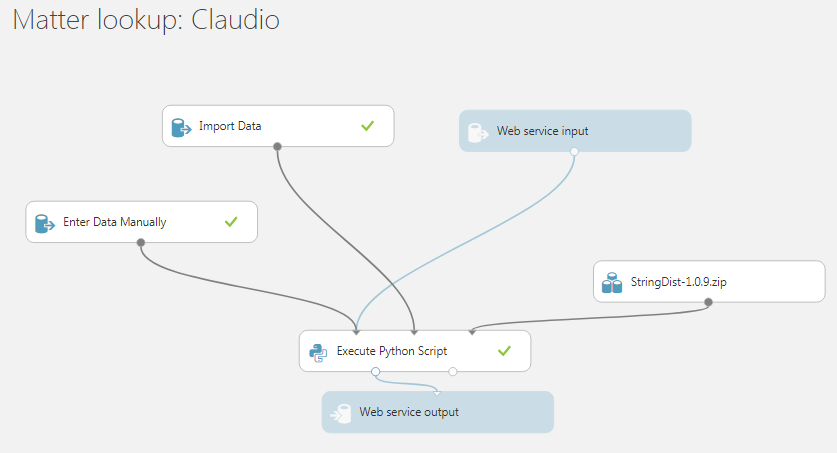